In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import dataset, distance, error, historical, split
np.seterr('raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

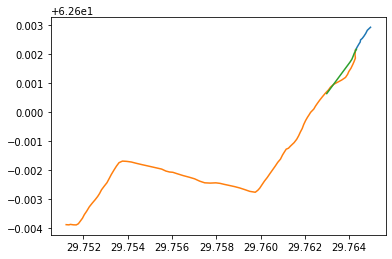

1228.617344478807
183.7103475580907


In [2]:
target_trajectory, data = dataset.load_users_trajectories_with_target(898, 1393786760018)
head, tail = split.split_trajectory_with_overlap(target_trajectory, 0.75)

head_x, head_y = head[:, 0], head[:, 1]
tail_x, tail_y = tail[:, 0], tail[:, 1]

prediction = historical.predict_by_picking_tail_with_similar_speed(data, head, 60, 10)
pred_x, pred_y = prediction[:, 0], prediction[:, 1]

head_x, head_y = head_x[-10:], head_y[-10:]
plt.plot(head_y, head_x)
plt.plot(tail_y, tail_x)
plt.plot(pred_y, pred_x)
plt.show()

print(distance.calculate_trajectory_length_in_meters(tail))
print(distance.calculate_trajectory_length_in_meters(prediction))

In [3]:
SECONDS = 60 # 1 minute
USER_ID = 898
RATIO = 0.5
THRESHOLD = 10
trajectory_ids = dataset.get_list_of_users_trajectory_ids(USER_ID)

errors = []
failed = 0

for trajectory_id in trajectory_ids:
    print(trajectory_id, end='')
    target_trajectory, data = dataset.load_users_trajectories_with_target(USER_ID, trajectory_id)
    head, tail = split.split_trajectory_with_overlap(target_trajectory, RATIO)
    prediction = historical.predict_by_picking_tail_with_similar_speed(data, head, SECONDS, THRESHOLD)

    if np.size(prediction, 0) < 2:
        failed += 1
        print(' failed')
        continue

    pred_dist = distance.calculate_trajectory_length_in_meters(prediction)

    if len(prediction) > 0 and np.size(prediction, 0) > 0 and np.size(prediction, 1) == 4 and pred_dist > 0:
        error_amount = error.calculate_error_vector(tail, prediction)[:, 4]
        errors.append(error_amount)
        print(' success', pred_dist, len(error_amount), sum(error_amount))
    else:
        failed += 1
        print(' failed')

errors_sum = list(map(sum, errors))

print(
    '\nERROR STATISTICS',
    '\naverage\t\t\t', np.average(errors_sum),
    '\nmedian\t\t\t', np.median(errors_sum),
    '\nstandard deviation\t', np.std(errors_sum),
    '\nfailed predictions\t', failed
)

1399399033400 success 95.38266250601703 7 264.88963694809246
1412515702026 success 137.3139283931137 18 337.2476017891192
1413382616849 failed
1379951571859 success 86.55186091500913 6 154.1497480723072
1379694392068 success 274.3500970628084 6 570.9091901483921
1407168712392 failed
1400436362445 success 296.20289633425324 7 299.47232867818894
1407593205810 success 234.4622080143103 6 182.4479692446007
1396953544784 success 119.24338155128473 7 128.09328818324443
1408208026280 success 358.50334758712785 7 1104.2597382921692
1404054152819 success 216.21576224869608 7 187.04319014604198
1401891357857 success 314.829973241425 7 288.08031067564343
1394042416405 success 89.34743527307523 6 256.899563870737
1380211927794 success 73.63743429074103 6 215.611968976047
1377681725292 success 287.2704155313305 7 324.9796300620058
1397840479593 failed
1398930716368 success 221.88490144604708 8 538.1466337049703
1396260541459 success 221.15749656160838 6 758.7143536332815
1404467994679 success 257.8

1397307370014 success 193.8006471800977 6 158.15045701967068
1397315289434 success 216.00752234388005 7 414.6350143561965
1401555619182 failed
1379750070367 failed
1404064273726 success 86.4473076842944 6 109.25085256362622
1402678393735 success 42.591030432299284 5 106.43902935831169
1377788791350 failed
1404468390177 success 230.11174111607076 7 618.5511935489083
1408288153631 success 245.50758874286146 7 690.7527417127535
1411964134234 success 92.96837333899333 7 140.89218154415204
1401629100713 failed
1378655206255 success 258.2074861357368 8 592.0579059918231
1402158474401 failed
1379302234528 success 63.46831089013406 6 110.25506344244708
1412417616700 success 90.37162221793625 5 228.37161274505252
1378141680529 success 38.14254208591198 14 611.7094244051174
1404389296311 success 266.3858347601905 6 191.3592213653028
1377503869598 success 242.5708162774647 7 598.5629658424135
1405012891914 success 79.12790495710223 5 152.30998602282355
1399295150237 success 241.73406364694705 7 2